In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu

Prepare data

In [26]:
df = pd.read_csv('data/DatasetEV2.csv')
df = df[df["85% carboxysome, 75%no carboxysome"] == 1]

df["carboxysome"] = df["carboxysome"].replace("0", "no carboxysome")
df["carboxysome"] = df["carboxysome"].replace("1", "carboxysome")

df['Rate mean [s-1]'] = df['Rate mean [s-1]'].astype(float)

my_pal = {"carboxysome": '#4cd456ff', "no carboxysome": '#d3d3d3ff'}

# Filter "thermophile/hot envir" 
df2 = pd.read_csv('data/DatasetEV3.csv')
df2 = df2[df2["85% carboxysome, 75%no carboxysome"] == 1]
df2_vent = df2[df2['environmental_context'] == "hydrothermal vent"]
df2_spring = df2[df2['environmental_context'] == "hot spring"]
df2_thermophile = df2[df2['T°_opt'] >= 45]

df2_thermophile_hot_envir = pd.concat([df2_vent, df2_spring, df2_thermophile])
df2_thermophile_hot_envir = df2_thermophile_hot_envir.drop_duplicates()

df2_filtered = df2[~df2.index.isin(df2_thermophile_hot_envir.index)]

# filter df based on the filter applied to df2
df_thermophile_hot_envir = df[df['Internal ID'].isin(df2_thermophile_hot_envir['Internal ID'])]
df_filtered = df[df['Internal ID'].isin(df2_filtered['Internal ID'])]


Statistical tests

In [27]:
group1 = df[df['carboxysome'] == 'carboxysome']['Rate mean [s-1]'].dropna()
group2 = df[df['carboxysome'] == 'no carboxysome']['Rate mean [s-1]'].dropna()

# Mann-Whitney U test
statistic, pvalue = mannwhitneyu(group1, group2)

if pvalue < 0.05:
    print(f'+ thermophilic/hot environment\nMann-Whitney U test: The two groups are significantly different. p = {pvalue}\n')
else:
    print('+ thermophilic/hot environment\nMann-Whitney U test: The two groups are not significantly different\n')

group1_filtered = df_filtered[df_filtered['carboxysome'] == 'carboxysome']['Rate mean [s-1]'].dropna()
group2_filtered = df_filtered[df_filtered['carboxysome'] == 'no carboxysome']['Rate mean [s-1]'].dropna()

# Mann-Whitney U test
statistic_filtered, pvalue_filtered = mannwhitneyu(group1_filtered, group2_filtered)

if pvalue_filtered < 0.05:
    print(f'- thermophilic/hot environments\nMann-Whitney U test: The two groups are significantly different. p = {pvalue_filtered}')
else:
    print('- thermophilic/hot environment\nMann-Whitney U test: The two groups are not significantly different')

+ thermophilic/hot environment
Mann-Whitney U test: The two groups are significantly different. p = 0.0010797905502020963

- thermophilic/hot environments
Mann-Whitney U test: The two groups are significantly different. p = 0.00404040404040404


Plot

/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

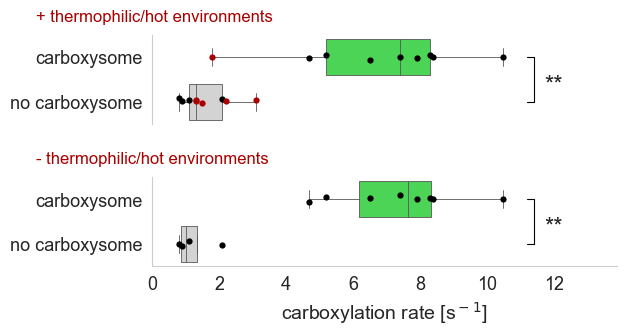

In [35]:
plt.rc('font', size=13)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 3), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.6})

# boxplot/swarmplot on first axis for the main group
sns.boxplot(data=df, x='Rate mean [s-1]', y='carboxysome', palette=my_pal, saturation=1, ax=axs[0], order=["carboxysome", "no carboxysome"], showfliers=False, linewidth=0.6)
sns.stripplot(data=df_filtered, x='Rate mean [s-1]', y='carboxysome', color='black', ax=axs[0], order=["carboxysome", "no carboxysome"], jitter=True, size=4.5)
sns.stripplot(data=df_thermophile_hot_envir, x='Rate mean [s-1]', y='carboxysome', color='#aa0000ff', ax=axs[0], order=["carboxysome", "no carboxysome"], jitter=True, size=4.5)


axs[0].set_ylabel('')
axs[0].spines.top.set_visible(False)
axs[0].spines.right.set_visible(False)
axs[0].spines.bottom.set_visible(False)
axs[0].set_xlabel('')
axs[0].set(xticklabels=[])
axs[0].tick_params(bottom=False)
axs[0].set_xlim(0, 13.9)
axs[0].grid(False)

# Add stars to box plot to indicate significance level
if pvalue <= 0.0001:
    star = '****'
elif pvalue <= 0.001:
    star = '***'
elif pvalue <= 0.01:
    star = '**'
elif pvalue <= 0.05:
    star = '*'
else:
    star = 'ns'

axs[0].plot([11.2, 11.4, 11.4, 11.2], [0, 0, 1, 1], lw=.8, c = 'black')
axs[0].text(12, .9, star, ha='center', va='bottom', fontsize=17)

# Create a second boxplot/swarmplot on the second axis without the "thermophile/hot envir" group
sns.boxplot(data=df_filtered, x='Rate mean [s-1]', y='carboxysome', palette=my_pal, saturation=1, ax=axs[1], order=["carboxysome", "no carboxysome"], showfliers=False, linewidth=0.6)
sns.stripplot(data=df_filtered, x='Rate mean [s-1]', y='carboxysome', color='black', ax=axs[1], order=["carboxysome", "no carboxysome"], jitter=True, size=4.5)

axs[1].set_ylabel('')
axs[1].spines.top.set_visible(False)
axs[1].spines.right.set_visible(False)
axs[1].set_xlabel('carboxylation rate [s$^-$$^1$]', fontsize=14)
axs[1].set_xlim(0, 13.9)
axs[1].grid(False)

# Add stars to box plot to indicate significance level
if pvalue_filtered <= 0.0001:
    star = '****'
elif pvalue_filtered <= 0.001:
    star = '***'
elif pvalue_filtered <= 0.01:
    star = '**'
elif pvalue_filtered <= 0.05:
    star = '*'
else:
    star = 'ns'

axs[1].plot([11.2, 11.4, 11.4, 11.2], [0, 0, 1, 1], lw=.8, c = 'black')
axs[1].text(12, .9, star, ha='center', va='bottom', fontsize=17)

axs[0].text(-0.25, 1.15, '+ thermophilic/hot environments', transform=axs[0].transAxes, fontsize=12, color="#aa0000ff")
axs[1].text(-0.25, 1.15, '- thermophilic/hot environments', transform=axs[1].transAxes, fontsize=12, color="#aa0000ff")

fig.patch.set_facecolor('none')
plt.savefig(r'plots/carbox_noncarbox_homog_no_thermophile_hot_envir.svg', dpi=300, bbox_inches='tight')
plt.show()


Summary table

In [31]:
df['tested'] = ""

df_count_tested = df.groupby("carboxysome")["tested"].count().reset_index()

df_count_active = df.groupby("carboxysome")['Rate mean [s-1]'].count().reset_index()
df_count_active.rename(columns={'Rate mean [s-1]': 'active'}, inplace=True)

df_count_medianrate = df.groupby("carboxysome")['Rate mean [s-1]'].median().reset_index()
df_count_medianrate.rename(columns={'Rate mean [s-1]': 'median rate'}, inplace=True)

df_count_stdev = df.groupby("carboxysome")['Rate mean [s-1]'].std().reset_index()
df_count_stdev.rename(columns={'Rate mean [s-1]': 'standard deviation'}, inplace=True)

df_count_iqr1 = df.groupby("carboxysome")['Rate mean [s-1]'].quantile(0.25).reset_index()
df_count_iqr1.rename(columns={'Rate mean [s-1]': 'IQR1'}, inplace=True)

df_count_iqr3 = df.groupby("carboxysome")['Rate mean [s-1]'].quantile(0.75).reset_index()
df_count_iqr3.rename(columns={'Rate mean [s-1]': 'IQR3'}, inplace=True)


df_count = pd.merge(df_count_tested, df_count_active, on=['carboxysome'])
df_count = pd.merge(df_count, df_count_medianrate, on=['carboxysome'])
df_count = pd.merge(df_count, df_count_stdev, on=['carboxysome'])
df_count = pd.merge(df_count, df_count_iqr1, on=['carboxysome'])
df_count = pd.merge(df_count, df_count_iqr3, on=['carboxysome'])

df_count['%clustering'] = ["85%", "75%"]

print('+ thermophilic/hot environment')
print(df_count)


df_filtered['tested'] = ""

df_count_tested = df_filtered.groupby("carboxysome")["tested"].count().reset_index()

df_count_active = df_filtered.groupby("carboxysome")['Rate mean [s-1]'].count().reset_index()
df_count_active.rename(columns={'Rate mean [s-1]': 'active'}, inplace=True)

df_count_medianrate = df_filtered.groupby("carboxysome")['Rate mean [s-1]'].median().reset_index()
df_count_medianrate.rename(columns={'Rate mean [s-1]': 'median rate'}, inplace=True)

df_count_stdev = df_filtered.groupby("carboxysome")['Rate mean [s-1]'].std().reset_index()
df_count_stdev.rename(columns={'Rate mean [s-1]': 'standard deviation'}, inplace=True)

df_count_iqr1 = df_filtered.groupby("carboxysome")['Rate mean [s-1]'].quantile(0.25).reset_index()
df_count_iqr1.rename(columns={'Rate mean [s-1]': 'IQR1'}, inplace=True)

df_count_iqr3 = df_filtered.groupby("carboxysome")['Rate mean [s-1]'].quantile(0.75).reset_index()
df_count_iqr3.rename(columns={'Rate mean [s-1]': 'IQR3'}, inplace=True)


df_count = pd.merge(df_count_tested, df_count_active, on=['carboxysome'])
df_count = pd.merge(df_count, df_count_medianrate, on=['carboxysome'])
df_count = pd.merge(df_count, df_count_stdev, on=['carboxysome'])
df_count = pd.merge(df_count, df_count_iqr1, on=['carboxysome'])
df_count = pd.merge(df_count, df_count_iqr3, on=['carboxysome'])

df_count['%clustering'] = ["85%", "75%"]

print('\n- thermophilic/hot environment')
print(df_count)


+ thermophilic/hot environment
      carboxysome  tested  active  median rate  standard deviation  IQR1  \
0     carboxysome      15       9          7.4            2.552014   5.2   
1  no carboxysome      29       9          1.3            0.744050   1.1   

   IQR3 %clustering  
0   8.3         85%  
1   2.1         75%  

- thermophilic/hot environment
      carboxysome  tested  active  median rate  standard deviation   IQR1  \
0     carboxysome       8       8         7.65            1.874595  6.175   
1  no carboxysome       4       4         1.00            0.596518  0.875   

    IQR3 %clustering  
0  8.325         85%  
1  1.350         75%  


/var/folders/xd/tzd66fkj5s5676432q_qccqr0000gn/T/ipykernel_77043/3354938454.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tested'] = ""
